## **Creating North Arrows**
This notebook will provide a tutorial on creating North Arrows for maps created using matplotlib/pyplot

### **Set-Up**

In [1]:
# Packages used by this tutorial
import geopandas # manipulating geographic data
import numpy # creating arrays
import pygris # easily acquiring shapefiles from the US Census
import matplotlib.pyplot # visualization

In [ ]:
# Downloading the state-level dataset from pygris
states = pygris.states(cb=True, year=2022, cache=False).to_crs(3857)

In [3]:
# Importing the main package
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
# from matplotlib_map_utils.core import NorthArrow, north_arrow # also valid
# from matplotlib_map_utils import NorthArrow, north_arrow # also valid

In [4]:
# This is just a function to create a new, blank map with matplotlib, with our default settings
def new_map(rows=1, cols=1, figsize=(5,5), dpi=150, ticks=False):
    # Creating the plot(s)
    fig, ax = matplotlib.pyplot.subplots(rows,cols, figsize=figsize, dpi=dpi)
    # Turning off the x and y axis ticks
    if ticks==False:
        if rows > 1 or cols > 1:
            for a in ax.flatten():
                a.set_xticks([])
                a.set_yticks([])
        else:
            ax.set_xticks([])
            ax.set_yticks([])
    # Returning the fig and ax
    return fig, ax

### **Using the** `north_arrow()` **function**
The quickest and easiest way to add a north arrow to a single plot is using the `north_arrow()` function

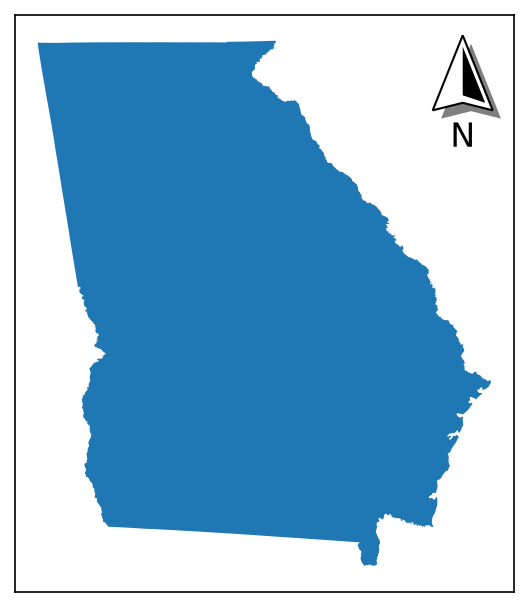

In [5]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Adding a north arrow to the upper-right corner of the axis, without any rotation (see Rotation under Formatting Components for details)
north_arrow(ax=ax, location="upper right", rotation={"degrees":0})

### **Using the** ``NorthArrow`` **class**
Alternatively, a `NorthArrow` class (based on `matplotlib.artist.Artist`) is also provided that allows the same arrow to be rendered like so:

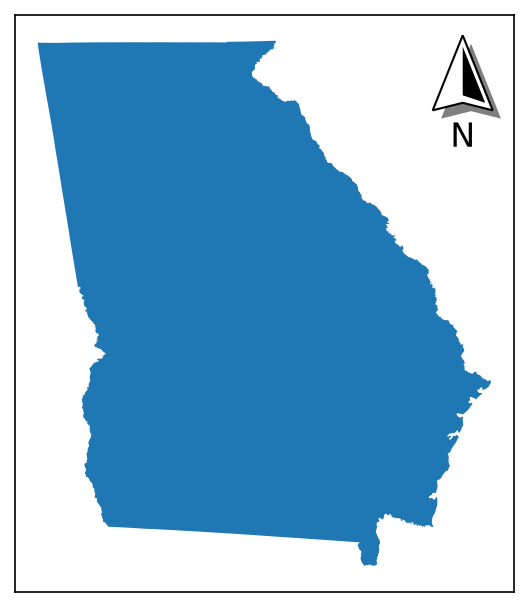

In [6]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Creating a NorthArrow object that we want to place in the upper-right corner of the axis, 
# without any rotation (see Rotation under Formatting Components for details)
# Note that here, we do not specify the axis
na = NorthArrow(location="upper right", rotation={"degrees":0})
# The NorthArrow can then be added using add_artist(), which calls its built-in draw() function:
ax.add_artist(na)

#### **Re-using Objects**
The benefit of the NorthArrow object is that it can be re-used across multiple plots without copy-pasting the function call. This is particularly beneficial for highly-customized arrows: you can simply set it up once, and then add it to each axis you want.

The caveat to this is that instead of using `ax.add_artist(NorthArrow)`, you have to use `ax.add_artist(NorthArrow.copy())`, as matplotlib does not let you add the same artist to multiple axes, so you have to add a *copy* of the artist.

ValueError: Can not reset the Axes. You are probably trying to reuse an artist in more than one Axes which is not supported

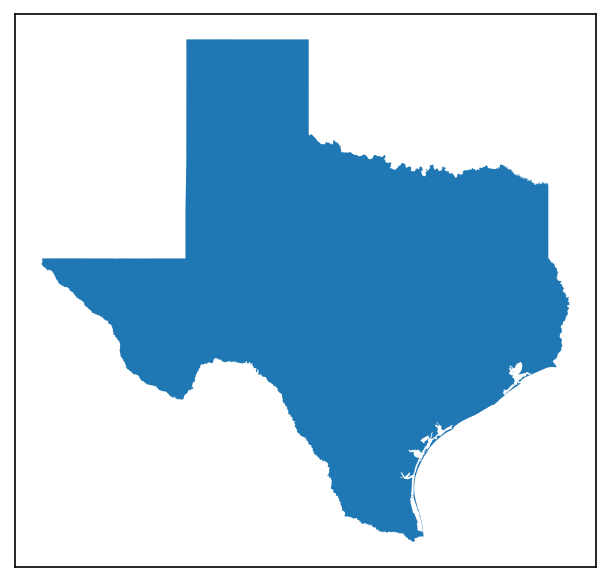

In [7]:
# Setting up a plot
fig, ax = new_map()
# Plotting a new state (Texas)
states.query("NAME=='Texas'").plot(ax=ax)
# Trying to re-use the same artist - this will throw an error
ax.add_artist(na)

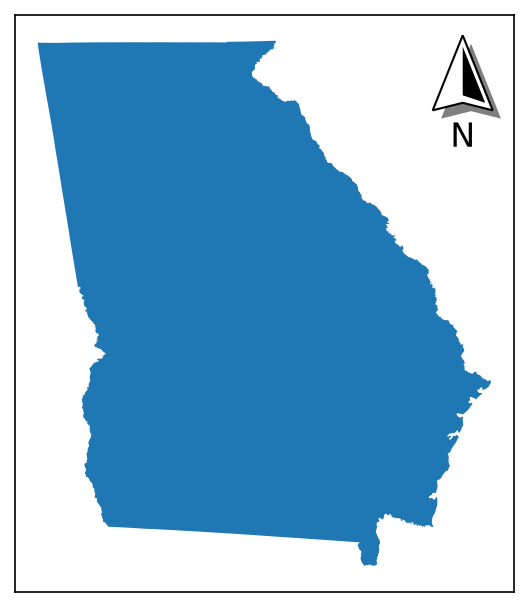

In [8]:
# Instead we have to do this
fig, ax = new_map()
states.query("NAME=='Georgia'").plot(ax=ax)
na = NorthArrow(location="upper right", rotation={"degrees":0})
# Note that you have to use .copy() here too!
ax.add_artist(na.copy())

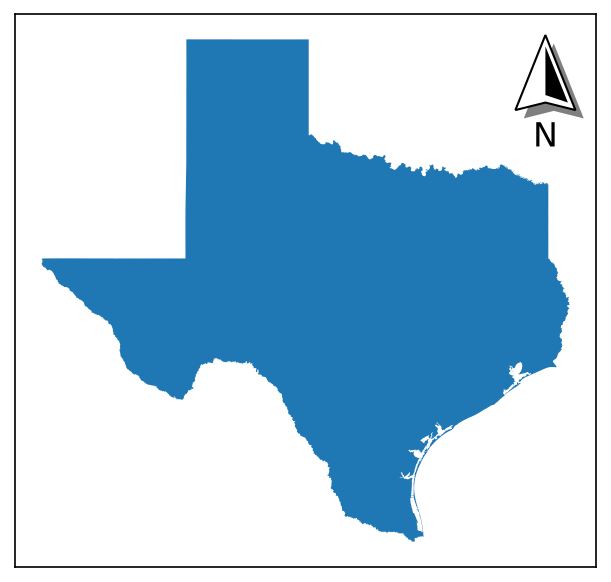

In [9]:
# Now we can do this
fig, ax = new_map()
states.query("NAME=='Texas'").plot(ax=ax)
# Using .copy() again will work this time
ax.add_artist(na.copy())

#### **Updating Class Objects**
The customization options of the NorthArrow can be accessed using dot notation (like na.base, na.label, etc.). They can also be updated from this dot notation by passing a valid style dictionary (see next section for details).

In [10]:
# Showing the label style options
na.label

{'text': 'N',
 'position': 'bottom',
 'ha': 'center',
 'va': 'baseline',
 'fontsize': 16,
 'fontfamily': 'sans-serif',
 'fontstyle': 'normal',
 'color': 'black',
 'fontweight': 'regular',
 'stroke_width': 1,
 'stroke_color': 'white',
 'rotation': 0,
 'zorder': 99}

In [11]:
# Updating the label style option for "position"
na.label = {"position":"top"}
na.label

{'text': 'N',
 'position': 'top',
 'ha': 'center',
 'va': 'baseline',
 'fontsize': 16,
 'fontfamily': 'sans-serif',
 'fontstyle': 'normal',
 'color': 'black',
 'fontweight': 'regular',
 'stroke_width': 1,
 'stroke_color': 'white',
 'rotation': 0,
 'zorder': 99}

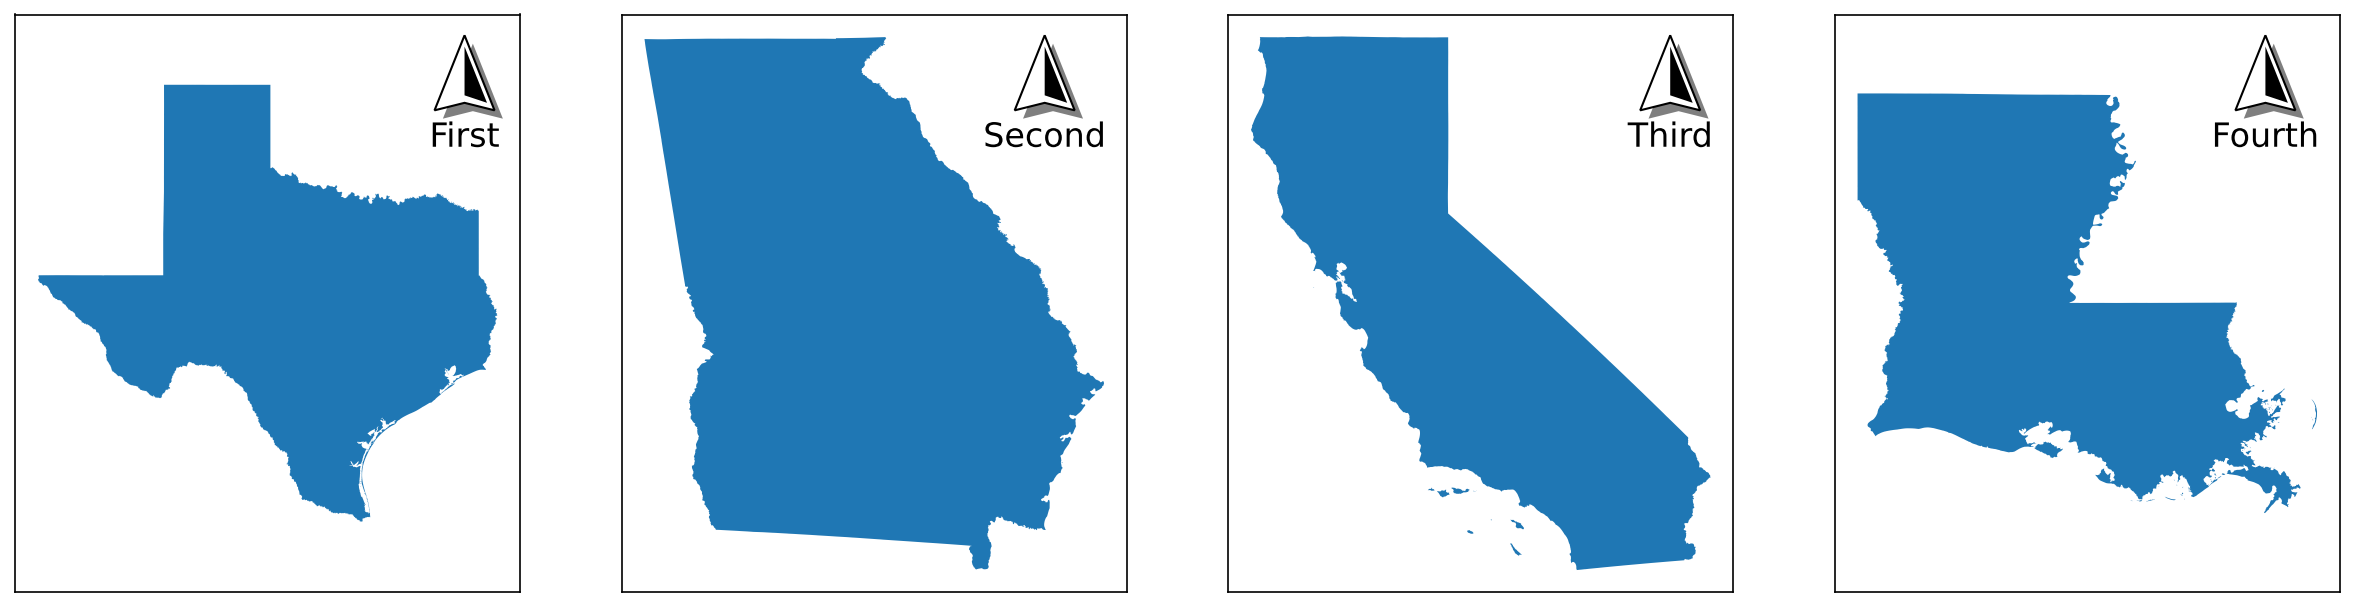

In [12]:
# This allows you to do something like so:
shapes = ["Texas","Georgia","California","Louisiana"]
labels = ["First","Second","Third","Fourth"]
# Creating the inital arrow
na = NorthArrow(location="upper right", rotation={"degrees":0})
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,l in zip(axs.flatten(), shapes, labels):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    na.label = {"text":l}
    ax.add_artist(na.copy())

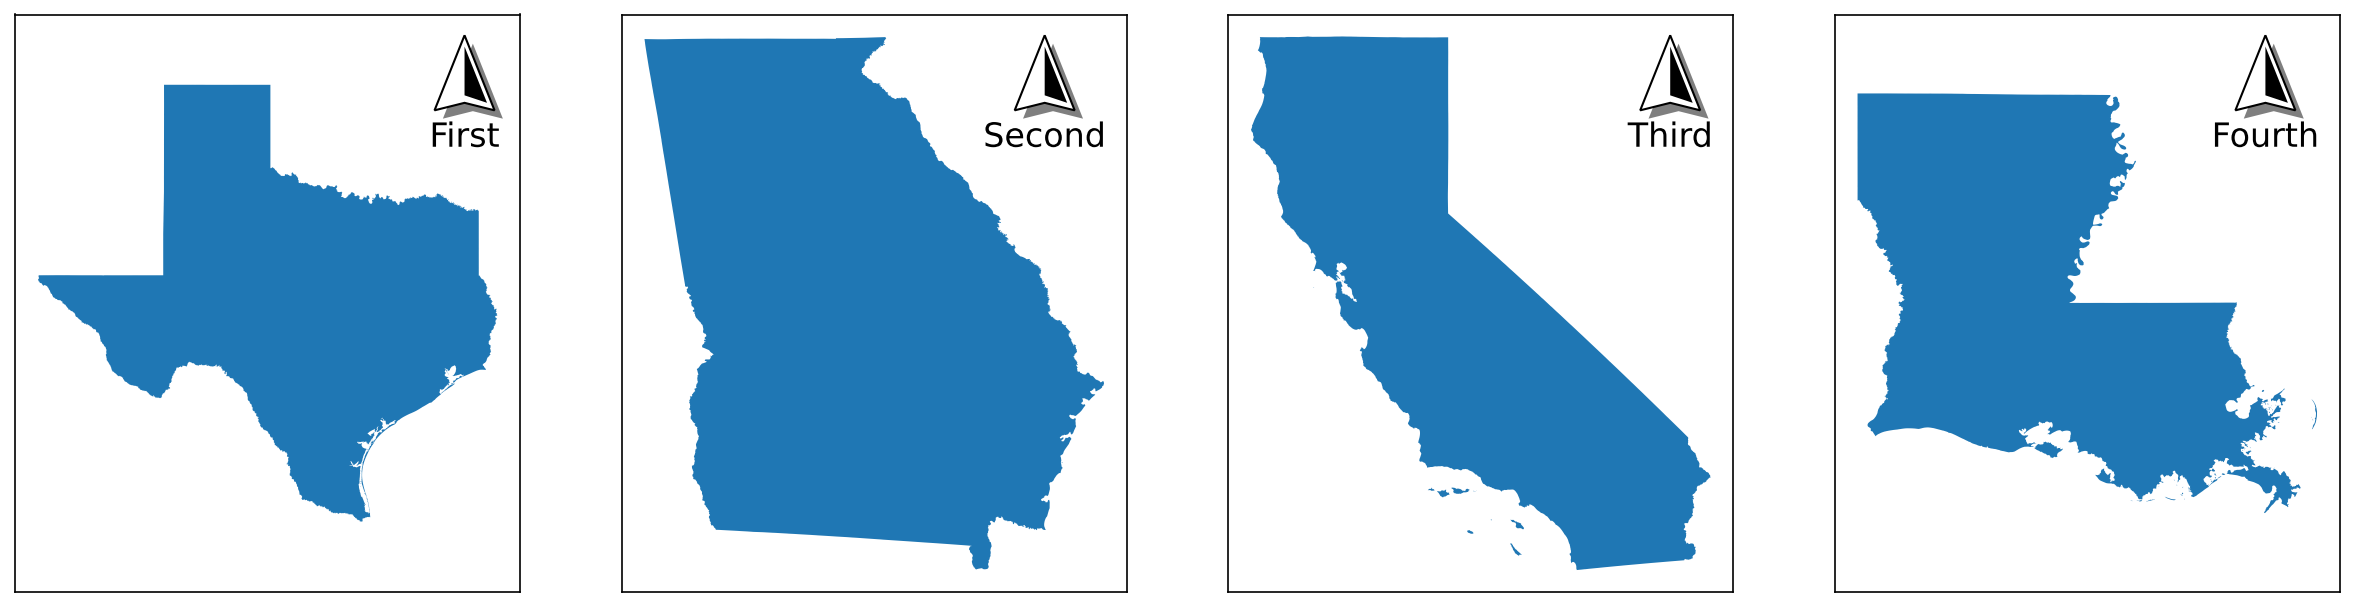

In [13]:
# Though for this specific example, you could accomplish the same with the north_arrow() function easily
shapes = ["Texas","Georgia","California","Louisiana"]
labels = ["First","Second","Third","Fourth"]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,l in zip(axs.flatten(), shapes, labels):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", label={"text":l}, rotation={"degrees":0})

### **Customizing the North Arrow**
Both the functional and object-oriented approach use the same primative style dictionaries, so you can treat the following information as valid for both

#### **Primary Settings**
There are three primary settings that must be supplied each time a north arrow is created:

* `location`: where the arrow will be placed relative to the plot. Will accept any of the options accepted by matplotlib for legend placement (`"upper right"`, `"center"`, `"lower left"`, etc., see *loc* in the [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) documentation). The default is "upper right".

* `scale`: the desired size of the north arrow's *height*, in inches. Will accept any float or integer. The default is whatever size is set by the `set_size()` function (see *Tips and Tricks* section).

* `zorder` (new as of `v3.1.0`): the zorder of the final north arrow artist, which can be used to bring the artist forward / place it behind other axis artists. The default value is 99.

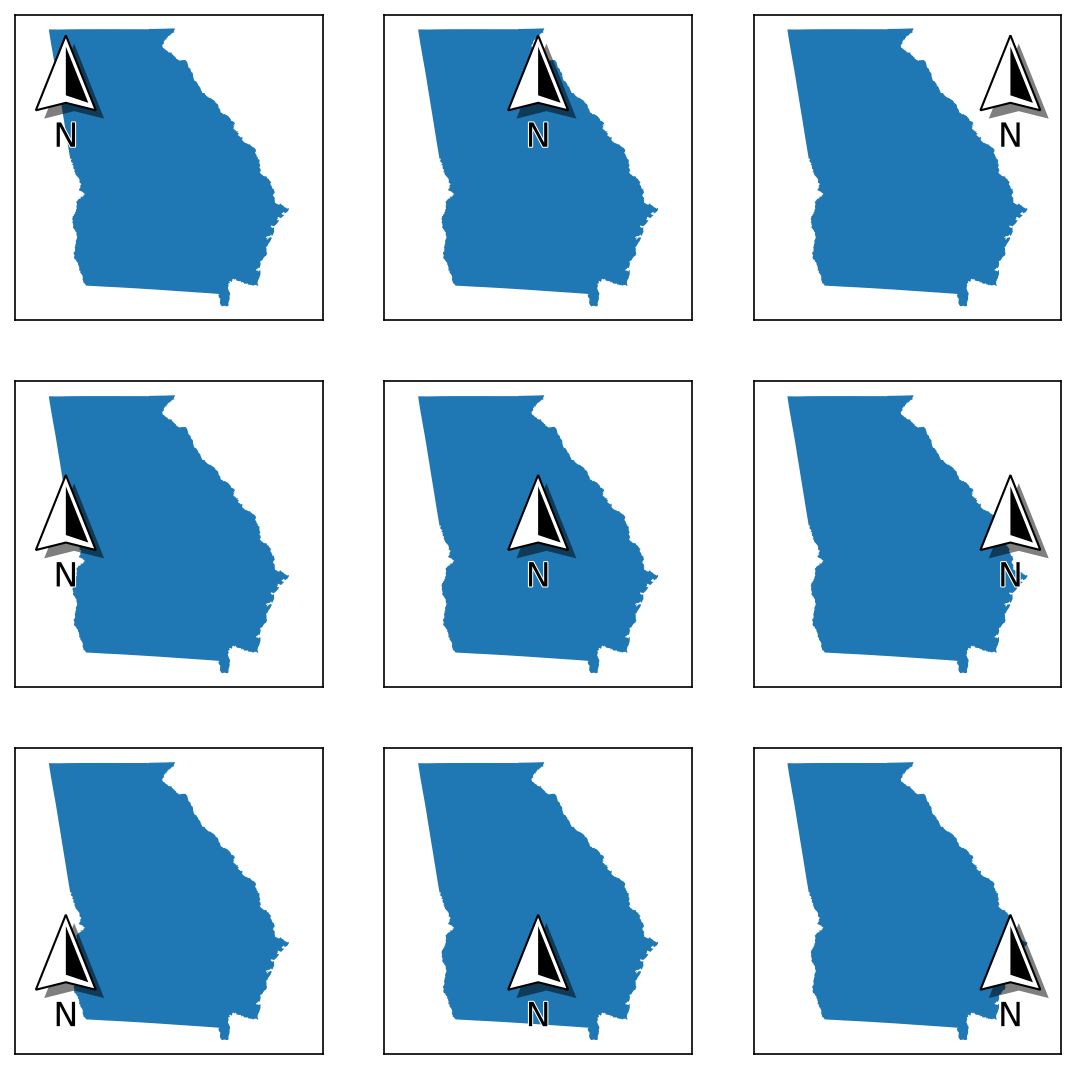

In [14]:
# Grid of location options
locs = ["upper left", "upper center", "upper right", "center left", "center", "center right", "lower left", "lower center", "lower right"]
fig, axs = new_map(3,3, figsize=(9,9))
for ax,l in zip(axs.flatten(), locs):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location=l, rotation={"degrees":0})

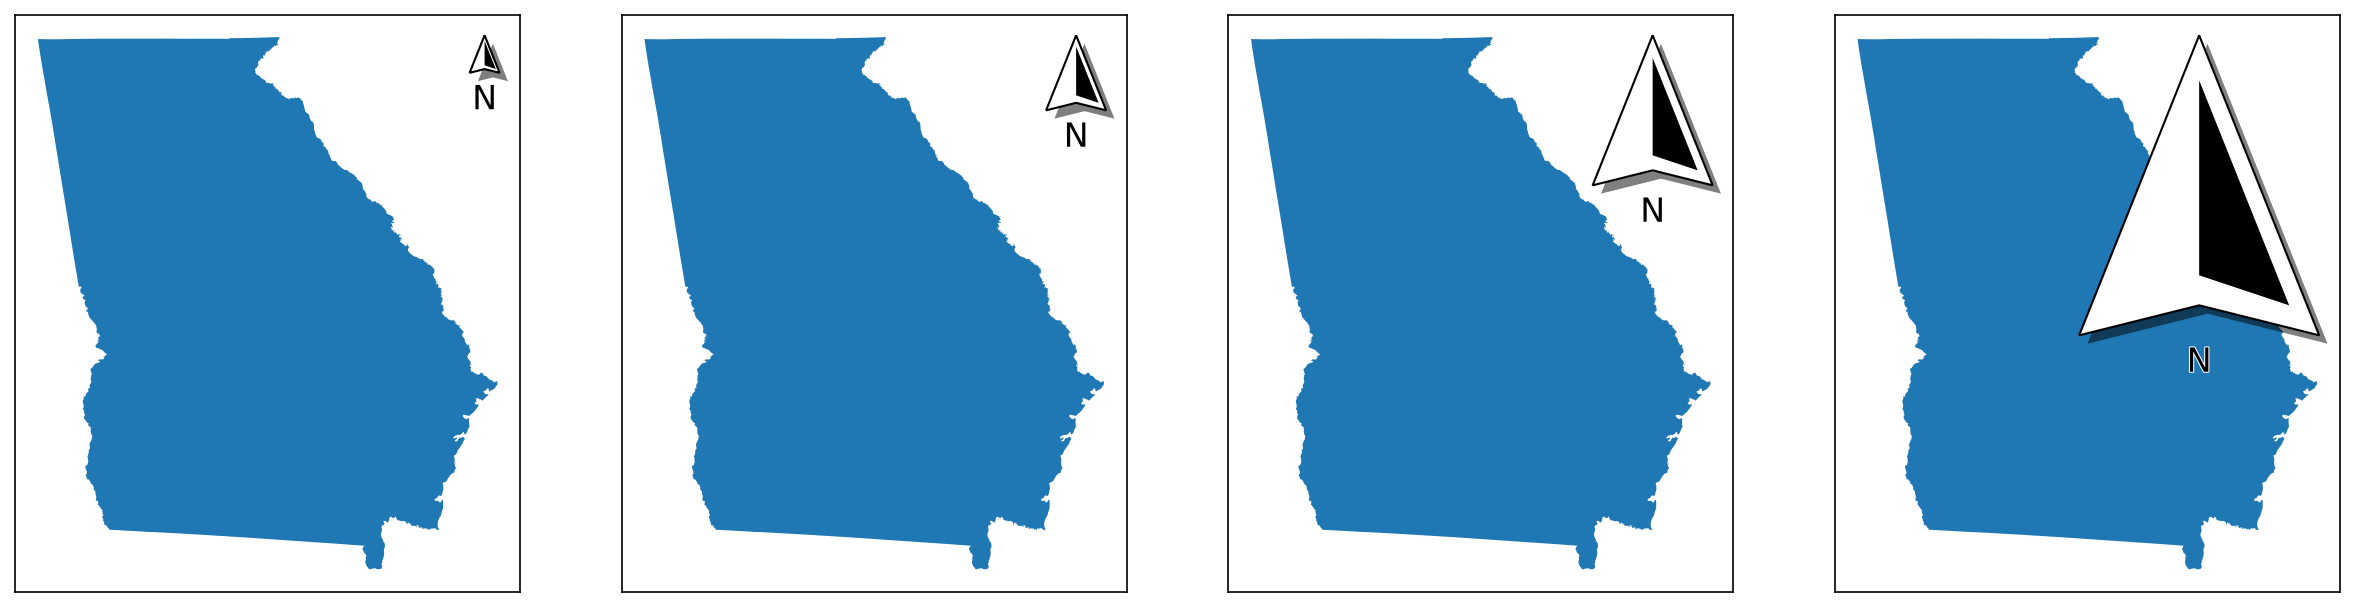

In [15]:
# Modifying the scale
# Recommend looking at the "Setting Size" section of "Tips and Tricks" for a better way to do this!
scales = [0.25, 0.5, 1, 2]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s in zip(axs.flatten(), scales):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, scale=s)

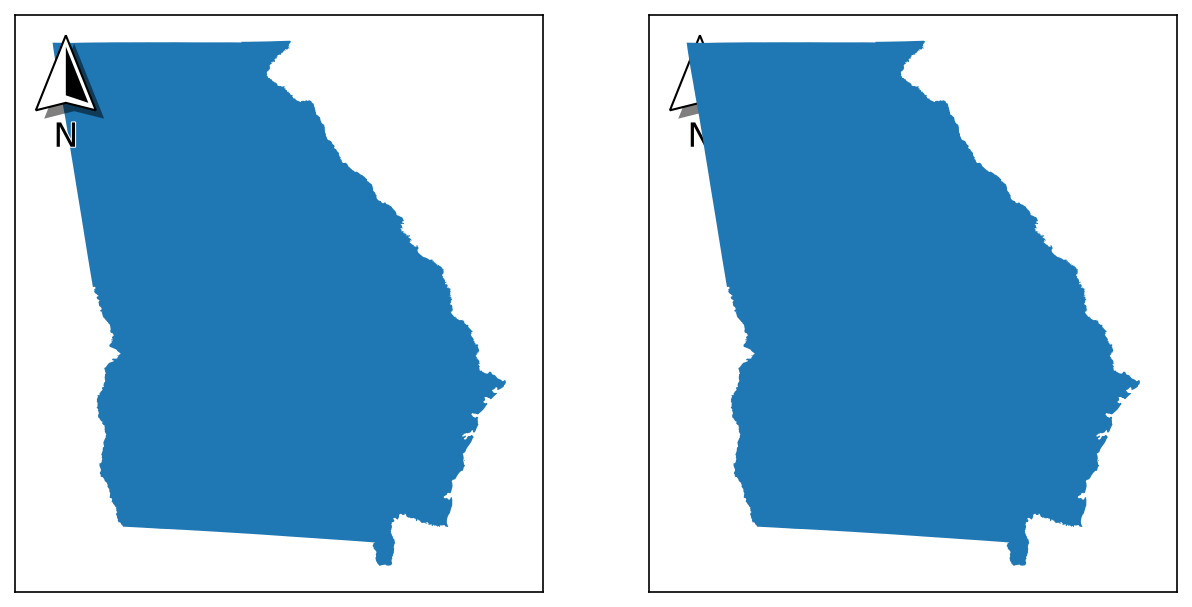

In [16]:
# An example to show changing zorders
zorders = [{"plot":5,"arrow":10}, {"plot":10,"arrow":5}]
# Creating four subplots
fig, axs = new_map(1,2, figsize=(10,5))
for ax,z in zip(axs.flatten(), zorders):
    states.query(f"NAME=='Georgia'").plot(ax=ax, zorder=z["plot"])
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper left", rotation={"degrees":0}, zorder=z["arrow"])

#### **Visible Components**
There are four "visible" components to the north arrow. Each of these is separately customizeable, and can be turned off entirely by passing a value of `False` to the function or object creation (passing `None` uses default values).

##### **Base**
`base` is the bottom-most visible layer and the most important component. 

* `coords`: the coordinates used to draw the shape of the base itself. Each coordinate exists on a plane from 0 to 1 in two dimensions, and is multipled by `scale` to get its corresponding size in inches. Will accept any `numpy.array` as an input.

* `facecolor`: the color of the main base patch. Will accept any matplotlib color value.

* `edgecolor`: the color of the edge of the base patch. Will accept any matplotlib color value.

* `linewidth`: the width of the edge of the base patch. Will accept any positive float or integer.

* `zorder`: the drawing order of the base patch. Recommended to be a lower number than the fancy patch. Will accept any positive float or integer. Is relative to the other artists that comprise the north arrow (label, fancy), NOT to the overall plot.

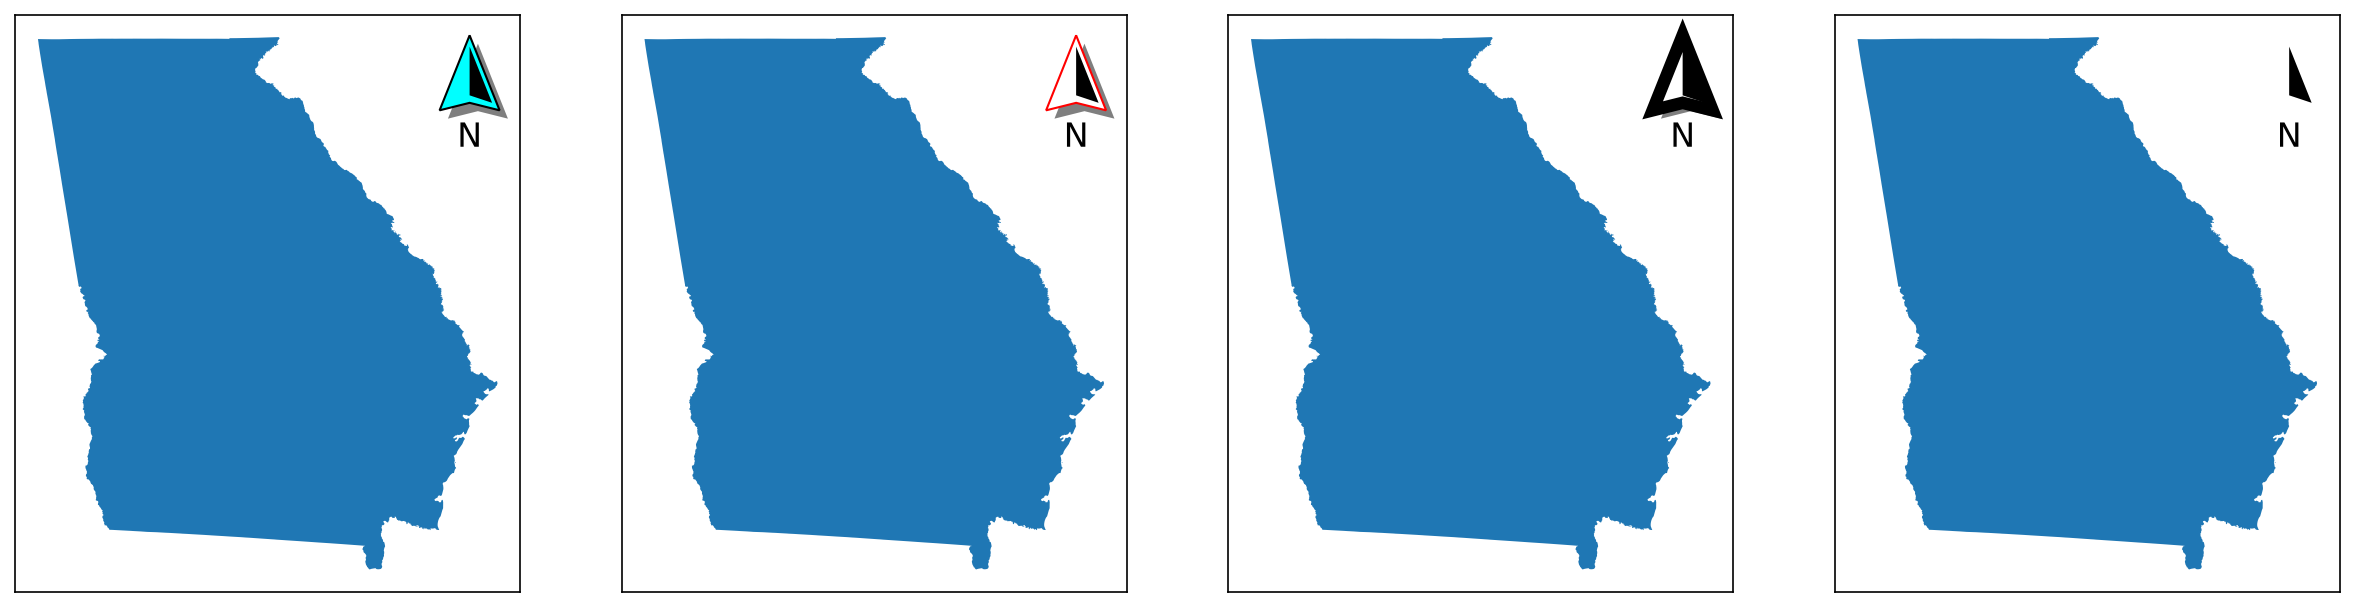

In [17]:
# Modifying specific elements
modifications = [
    {"facecolor":"cyan"}, # changing the color
    {"edgecolor":"red"}, # changing the color
    {"linewidth":6}, # changing the stroke
    False # hiding it entirely - note that the shadow is hidden here too, as it is dependent on the base artist for visibility
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, base=m)

##### **Fancy**
`fancy` is the half-shape patch on top of the `base` (in the examples above, it appears as black). 

* `coords`: the coordinates used to draw the shape of the patch itself. Each coordinate exists on a plane from 0 to 1 in two dimensions, and is multipled by `scale` to get its corresponding size in inches. Will accept any `numpy.array` as an input.

* `facecolor`: the color of the patch. Will accept any matplotlib color value.

* `zorder`: the drawing order of the patch. Recommended to be a higher number than the base patch. Will accept any positive float or integer. Is relative to the other artists that comprise the north arrow (base, label), NOT to the overall plot.

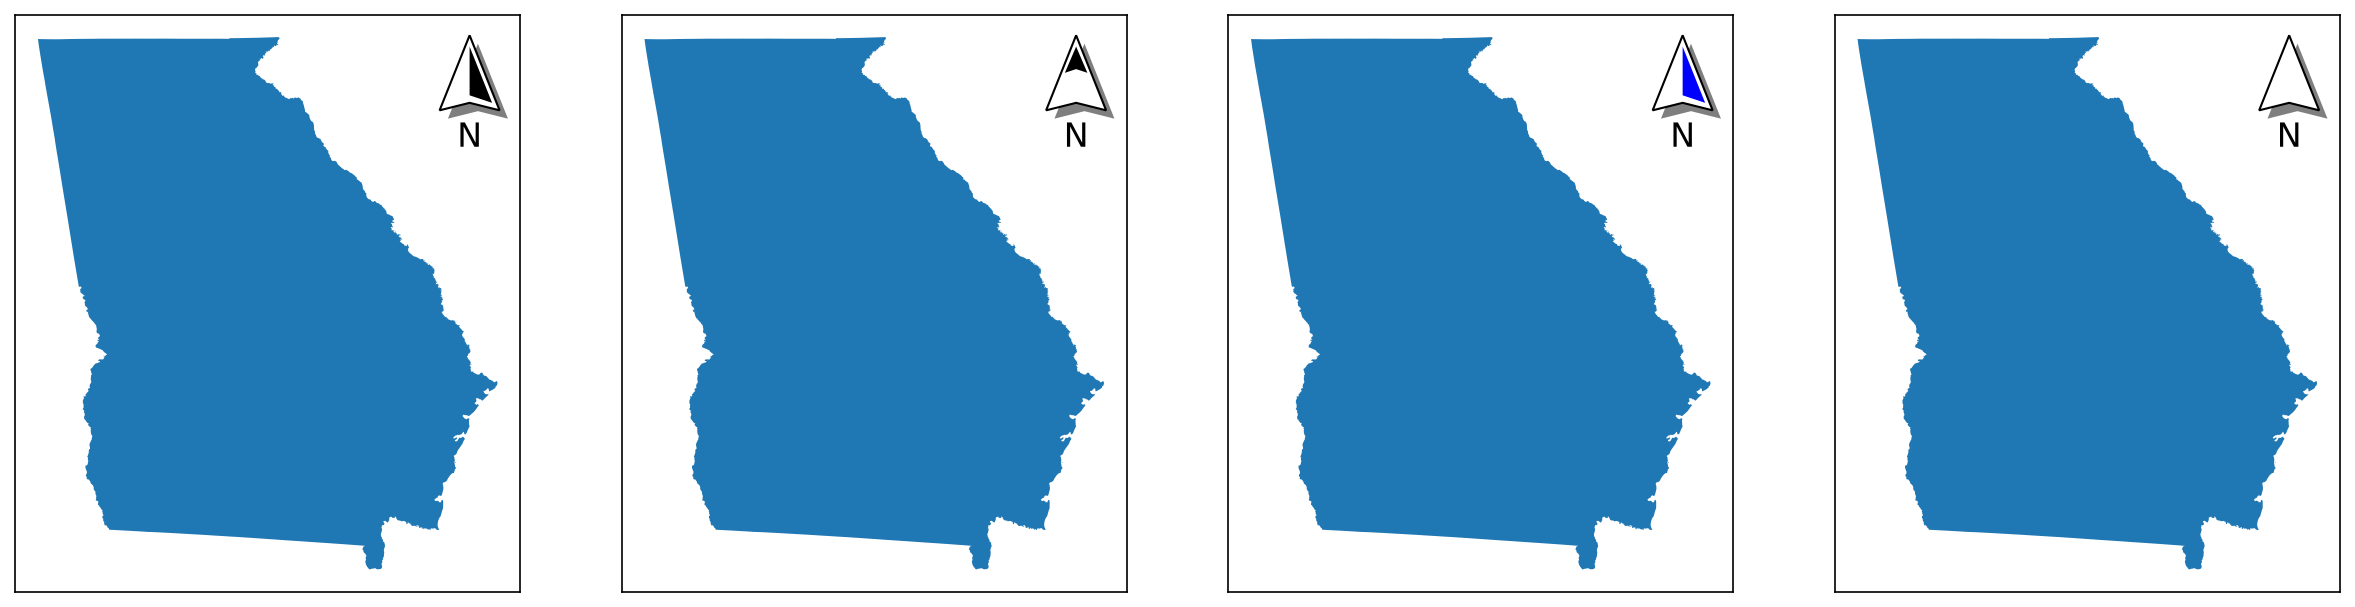

In [18]:
# Modifying specific elements
modifications = [
    True, # normal patch
    {"coords":numpy.array([(0.50, 0.85), (0.35, 0.50), (0.50, 0.55), (0.65, 0.50), (0.50, 0.85)])}, # changing the shape
    {"facecolor":"blue"}, # changing the color
    False # hiding it entirely
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, fancy=m)

##### **Label**
`label` is the text that appears appears around the arrow.

* `text`: The text that will be displayed. Any string will be accepted.

* `position`: The position of the text relative to the arrow itself. Can be any of `top`, `bottom`, `left`, or `right`.

* `ha`: How the text is positioned horizontally - see matplotlib documentation for more details. Can be any of `left`, `center`, or `right`.

* `va`: How the text is positioned vertically - see matplotlib documentation for more details. Can be any of `baseline`, `bottom`, `center`, `center_baseline`, or `top`.

* `fontsize`: The size of the text. Will accept any float, int, or string value (such as `small` or `xx-large`) - see matplotlib documentation for more details.

* `fontfamily`: The appearance of the text - see matplotlib documentation for more details. Can be any of `serif`, `sans-serif`, `cursive`, `fantasy`, or `monospace`.

* `fontstyle`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `italic`, or `oblique`.

* `color`: the color of the main text. Will accept any matplotlib color value.

* `fontweight`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `bold`, `heavy`, `light`, `ultrabold`, or `ultralight`.

* `stroke_width`: the width of the outline of the text. Will accept any positive float or integer.

* `stroke_color`: the color of the outline of the text. Will accept any matplotlib color value.

* `rotation`: The rotation of the text centrally. Note that this works differently than the `rotation` of the arrow itself (see the appropriate section under *Formatting Components*)

* `zorder`: the drawing order of the text patch. Will accept any positive float or integer. Is relative to the other artists that comprise the north arrow (base, fancy), NOT to the overall plot.

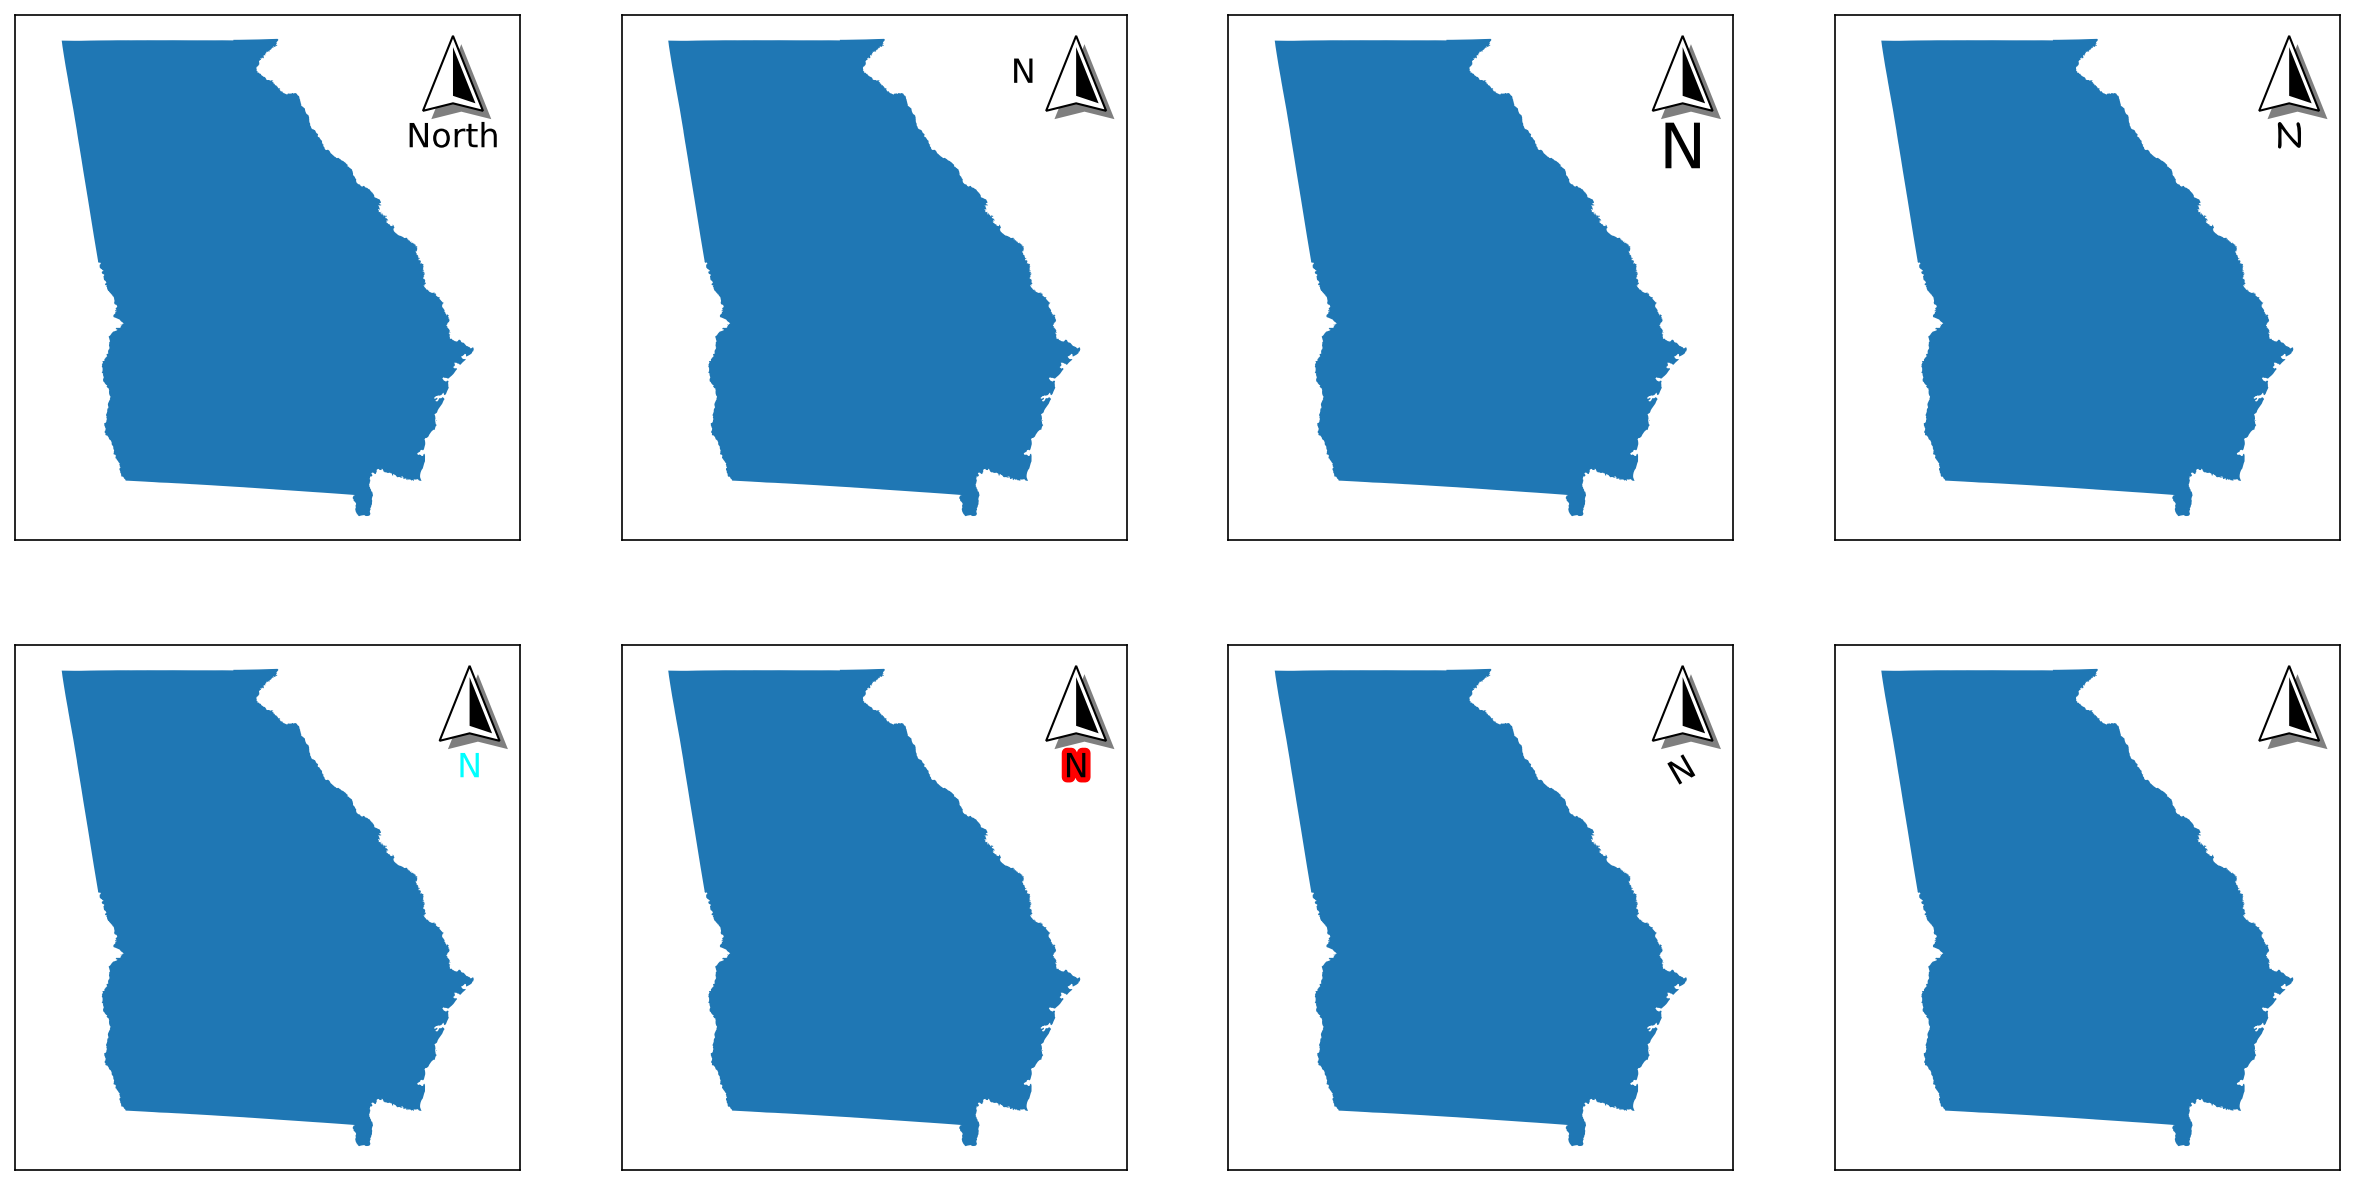

In [19]:
# Modifying specific elements
modifications = [
    {"text": "North"}, # changing the text
    {"position": "left"}, # changing the position
    {"fontsize": 30}, # changing the size
    {"fontfamily": "cursive"}, # changing the family
    {"color": "cyan"}, # changing the color of the text
    {"stroke_width": 5, "stroke_color": "red"}, # changing the stroke size and color
    {"rotation": 30}, # changing the rotation
    False # hiding it entirely
]
# Creating four subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, label=m)

##### **Shadow**
`shadow` is the path effect on the `base` patch that creates the shadow effect - it is applied using [`matplotlib.patheffects.withSimplePatchShadow`](https://matplotlib.org/stable/api/patheffects_api.html#matplotlib.patheffects.SimplePatchShadow).

* `offset`: A tuple of coordinates that defines where the shadow appears relative to the base patch. Each coordinate can be either a float or an integer.

* `alpha`: The transparency of the shadow patch. Will accept any positive float or integer between 0 and 1.

* `shadow_rgbFace`: The color of the shadow patch. Will accept any matplotlib color value.

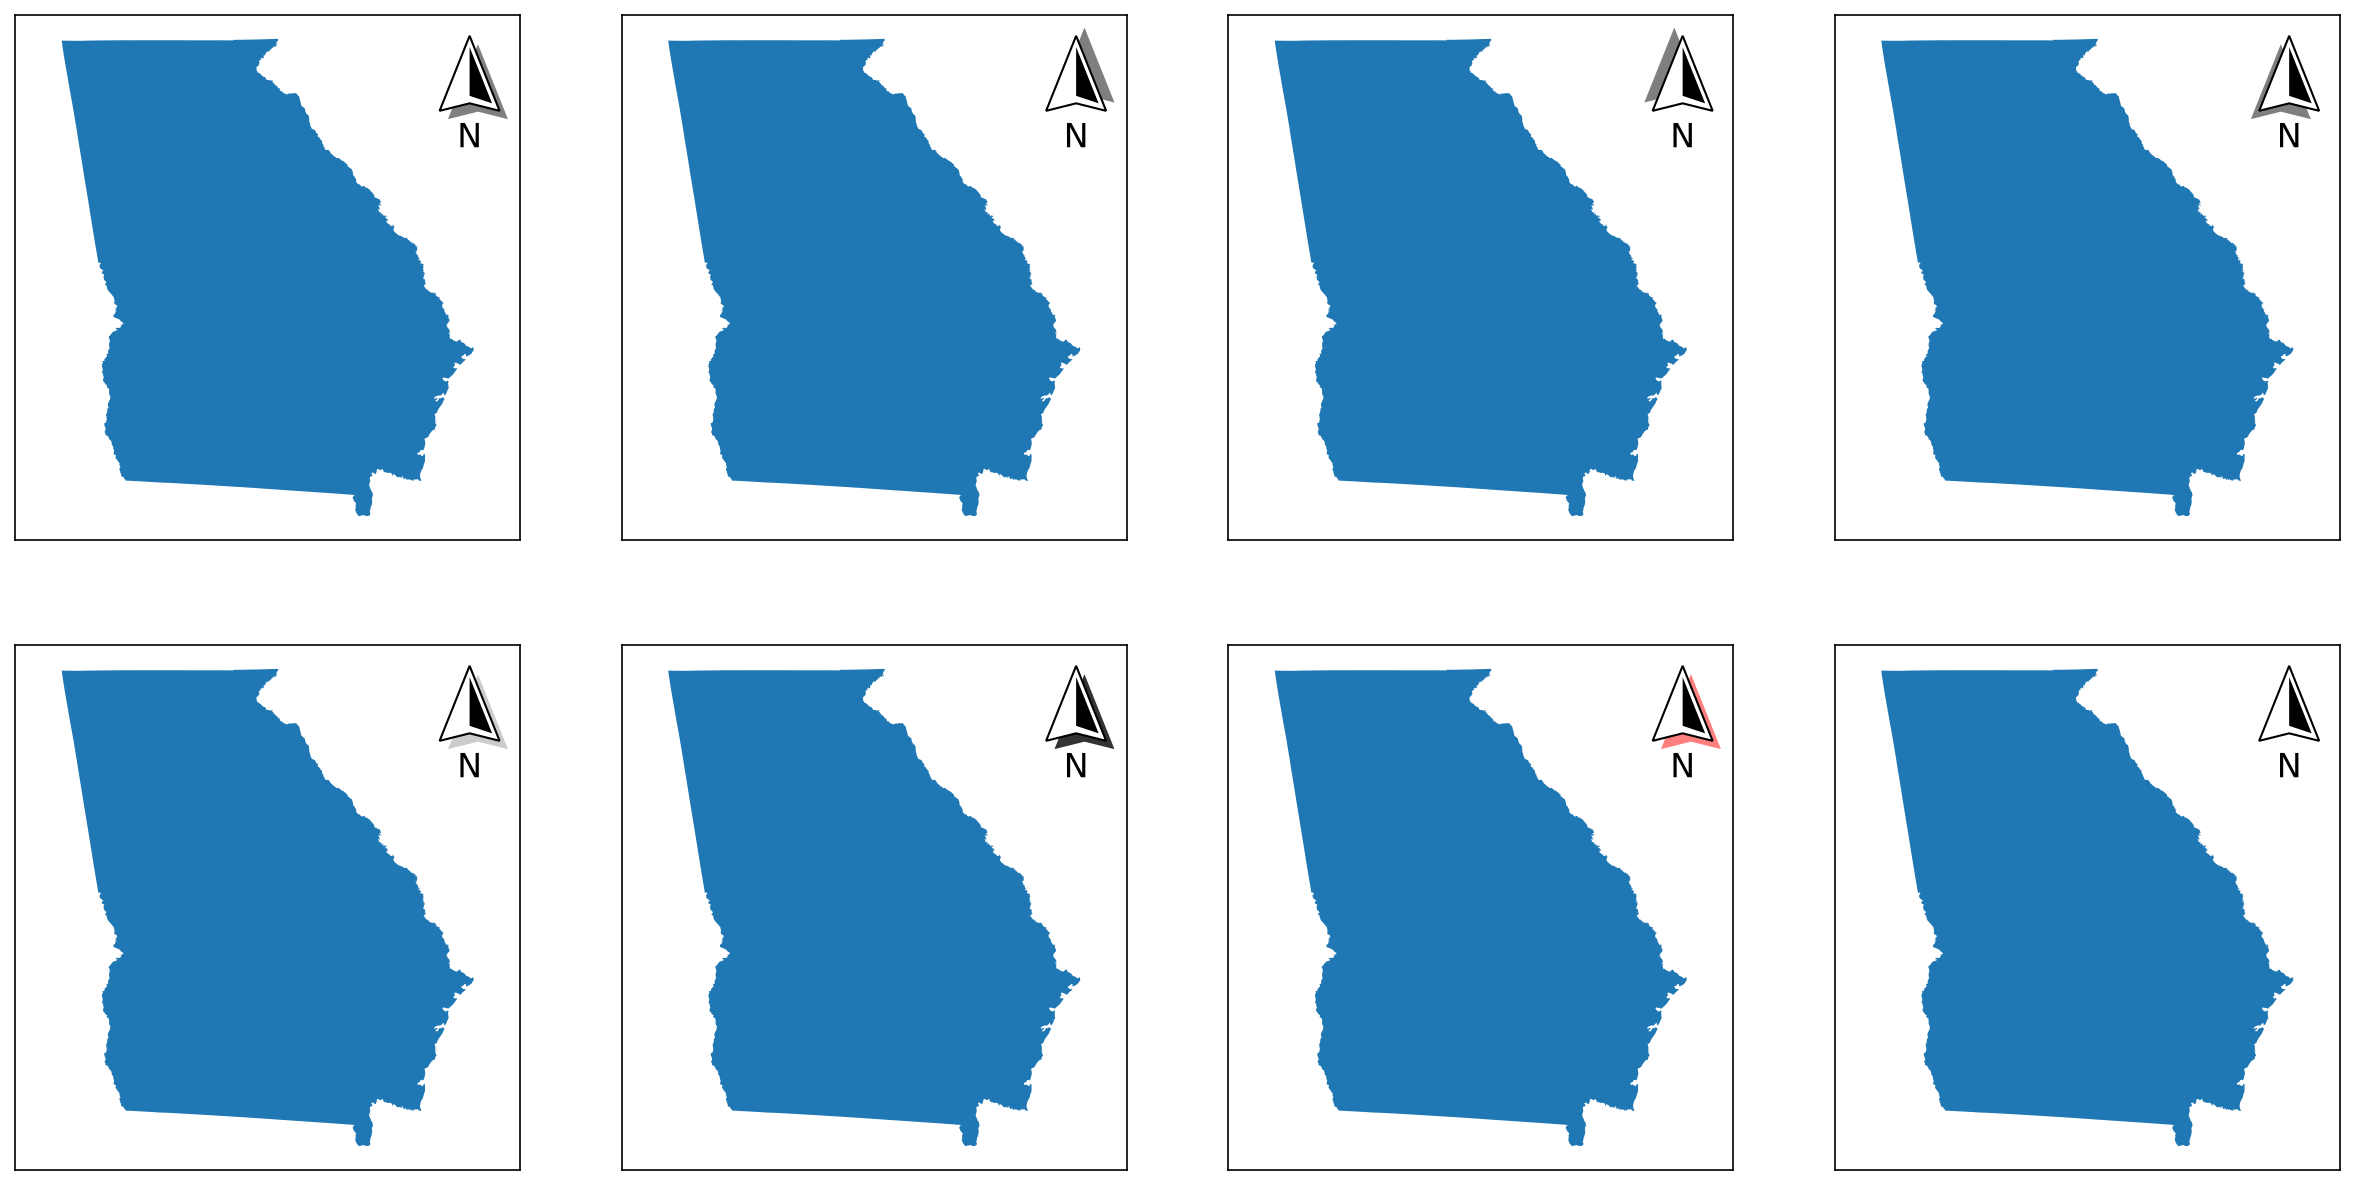

In [20]:
# Modifying specific elements
modifications = [
    {"offset": (4, -4)}, # changing the offset
    {"offset": (4, 4)}, # changing the offset
    {"offset": (-4, 4)}, # changing the offset
    {"offset": (-4, -4)}, # changing the offset
    {"alpha": 0.2}, # changing the transparency
    {"alpha": 0.8}, # changing the transparency
    {"shadow_rgbFace": "red"}, # changing the color
    False # hiding it entirely
]
# Creating four subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, shadow=m)

#### **Formatting Components**
There are three "invisible" components to the north arrow - so called because they are mainly there to help position the arrow and its individual components. Unlike the "visible" components, these cannot be turned off, but they are still separately customizeable.

##### **Pack**
`pack` customizes the [`HPacker`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.HPacker) or [`VPacker`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.VPacker) object that handles the positioning of the `label` relative to the `base` patch (and `fancy` patch if it is included). Whether or not it is an `HPacker` or `VPacker` is used is dependent on the `position` option from the `label`, but the settings are the same for both.
* `sep`: The amount of spacing to have *between the elements*, in points. Will accept any positive float or integer.

* `align`: How each element is aligned. Can be any of `top`, `bottom`, `left`, `right`, `center`, or `baseline`.

* `pad`: The amount of padding around the box, in points. Will accept any positive float or integer. *Note that this is usually kept at 0, and controlled instead using the `aob` settings (below).*

* `width` and `height`: The dimensions of the box, in pixels. Will accept any positive float or integer. *Kept as `None` for most circumstances so calculated manually.*

* `mode`: How the elements are packed within the box. Can be any of `fixed`, `expand`, or `equal`. See documentation for `HPacker` and `VPacker` as to how each mode works. *Default is `fixed`.

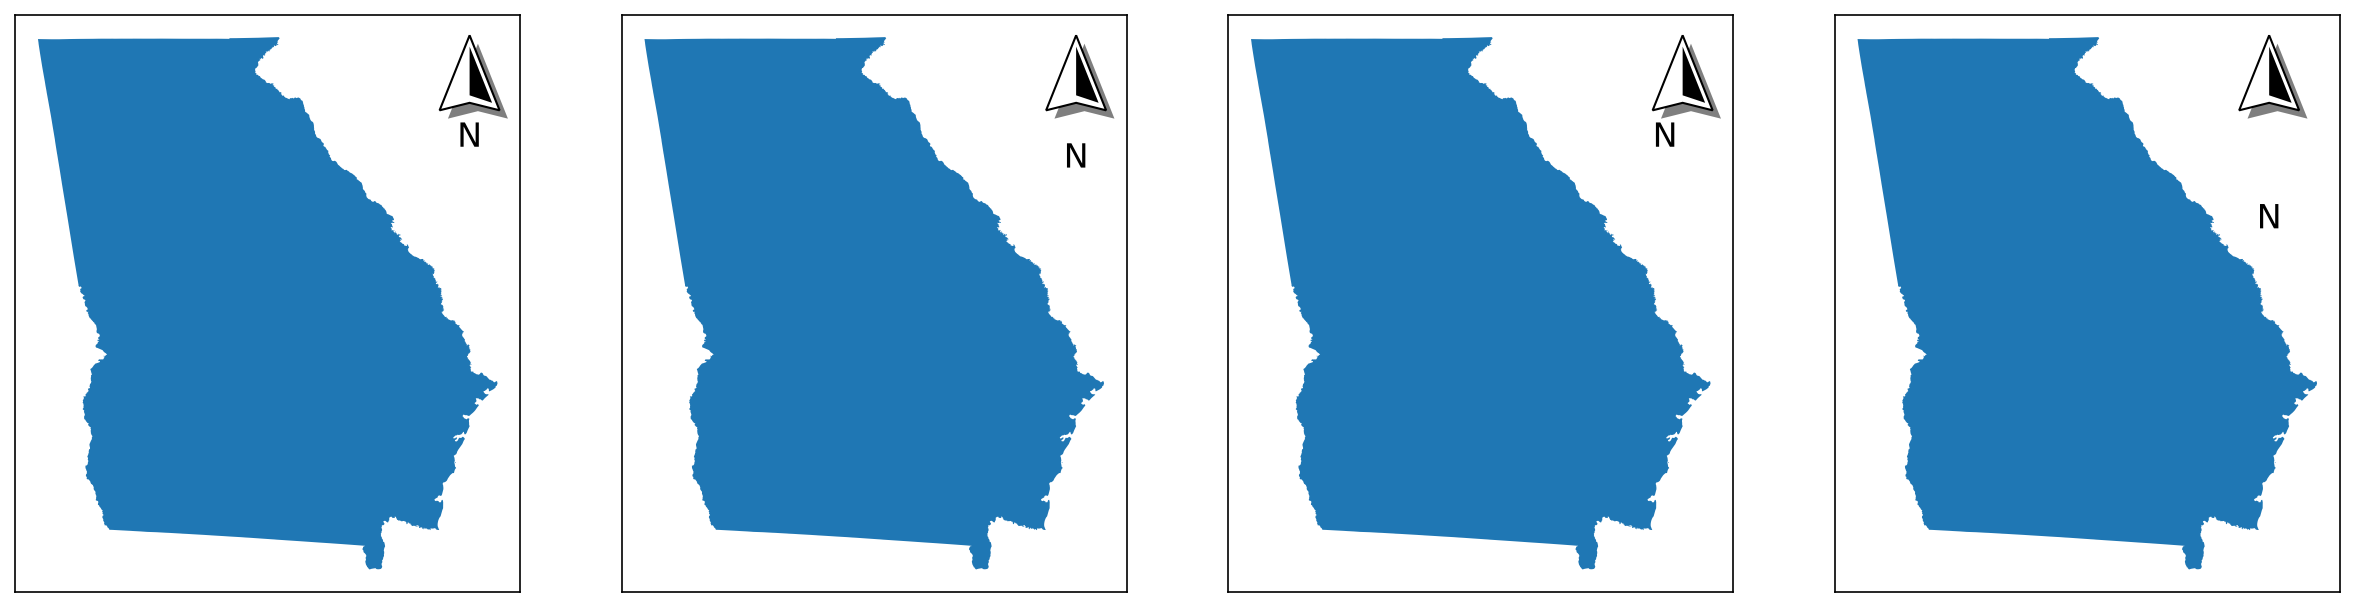

In [21]:
# Modifying specific elements
modifications = [
    None, # default settings
    {"sep": 15}, # increased separation between items
    {"align": "left"}, # changing the alignment of items
    {"width": 100, "height": 200, "mode": "expand"}, # changing the mode, not a great example
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, pack=m)

##### **AOB**
`aob` customizes the [`AnchoredOffsetBox`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.AnchoredOffsetbox) object that handles the positioning of the final north arrow object with respect to the *plot*. Note that `facecolor`, `edgecolor`, and `alpha` are non-standard options.

* `facecolor`: The color of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `edgecolor`: The color of the edge of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `alpha`: The transparency of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `pad`: The amount of padding around the north arrow, defining the edges of the `AnchoredOffsetBox`. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `borderpad`: The amount of padding between the `AnchoredOffsetBox` and the `bbox_to_anchor`, if one is specified. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `prop`: A reference fontsize used to define the paddings of `pad` and `borderpad`. Will accept any valid fontsize input.

* `frameon`: Whether or not to draw a frame around the box. Will accept either `True` or `False`.

* `bbox_to_anchor` and `bbox_transform`: Used to customize the placement of the `AnchoredOffsetBox`. See *Tips and Tricks* section for details.

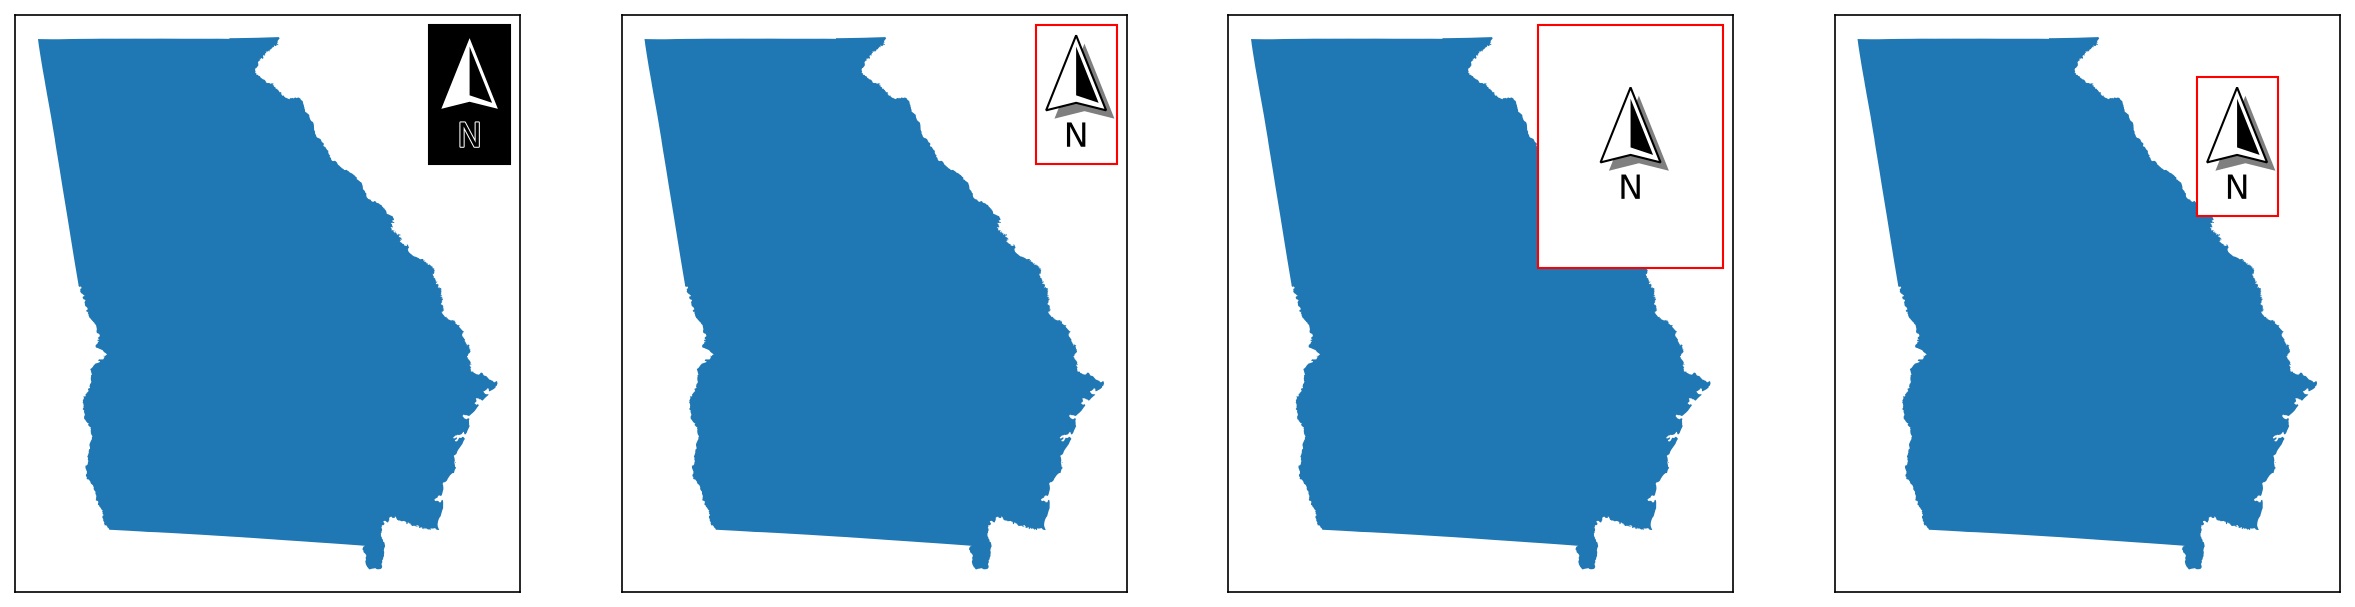

In [22]:
# Modifying specific elements
modifications = [
    {"facecolor": "black"}, # different facecolor
    {"edgecolor": "red"}, # different edgecolor
    # these two show the difference between pad and borderpad
    {"edgecolor": "red", "pad": 3}, # increased pad
    {"edgecolor": "red", "borderpad": 3}, # increased borderpad
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, aob=m)

##### **Rotation**
`rotation` controls how the north arrow is rotated so that it points upwards (towards true north). There are two ways to customize this.
* `degrees`: If `degrees` is set to a value (between -360 and 360), the arrow will simply be rotated to that point. This can be used to point to other directions is necessary, or if the direction to north is known.

* `crs`, `reference`, and `coords`: If the direction to north is *not* known, it can be automatically calcuated with three pieces of information:
  
  * `crs`: The coordinate reference system that the map is in. Will accept any `pyproj` CRS value (including strings and integers).
  
  * `reference`: The *type* of reference point from which north will be calcualted. Can be any of `axis`, `data`, or `center`.
  
  * `coords`: A tuple of coordinates from which north will be calculated. Each coordinate can be either a float or an integer.
    
    * If `reference` is `axis`, then `coords` should be in *axis* coordinates, where (0,0) represents the bottom-left point of the plot, and (1,1) represents the top-right point of the plot.
    
    * If `reference` is `data`, then `coords` should be in *data* coordinates, meaning that of the CRS supplied by `crs`.
    
    * If `reference` is `center`, then a value of `coords` is not necessary - it is the equivalent of setting `reference` to `axis` and `coords` to (0.5, 0.5). This is how most common software such as ArcGIS Pro and QGIS calculate the rotation of the north arrow.

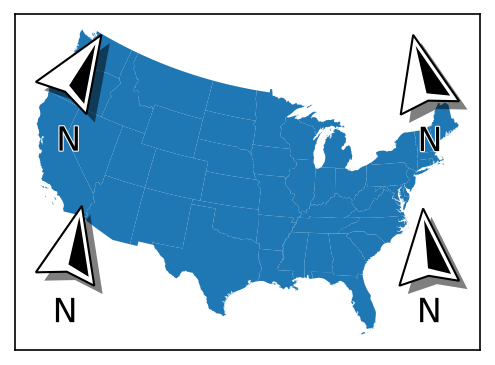

In [23]:
# Demonstrating how the rotation changes based on the reference point
modifications = [
    ["lower left", {"crs":3520, "reference":"axis", "coords":(0.1, 0.1)}],
    ["upper left", {"crs":3520, "reference":"axis", "coords":(0.1, 0.9)}],
    ["upper right", {"crs":3520, "reference":"axis", "coords":(0.9, 0.9)}],
    ["lower right", {"crs":3520, "reference":"axis", "coords":(0.9, 0.1)}],
]
# Creating a single plot for the contiguous USA
to_exclude = ['Hawaii','Alaska','Guam','Commonwealth of the Northern Mariana Islands','United States Virgin Islands','American Samoa','Puerto Rico']
fig, ax = new_map(1,1, figsize=(4,6))
# Note that I'm using a CRS here that will create rotations explicitly! 3520 is really only suitable for Georgia.
states.query(f"NAME not in {to_exclude}").to_crs(3520).plot(ax=ax)
for m in modifications:
    north_arrow(ax=ax, location=m[0], rotation=m[1])

### **Tips and Tricks**

#### **Setting Size**
While the north arrow can nominally have its size changed by changing the `scale` attribute, doing so doesn't change the other, related components, such as the sizes of the text, the shadow's offset, the stroke widths, and so on.

However, given that there are standardized paper sizes that most graphics are made towards, a specific function, `set_size()`, is provided that will batch-update the default values of the north arrow to approximate what looks best at each size. The function takes in only one input, which is the size you want to update the arrow to be:

* `xsmall` or `xs` for A8 paper, ~2 to 3 inches

* `small` or `sm` for A6 paper, ~4 to 6 inches

* `medium` or `md` for A4 or letter paper, ~8 to 11 inches

* `large` or `lg` for A2 paper, ~16 to 24 inches

* `xlarge` or `xl` for A0 paper, ~33 to 48 inches

These default values can be seen in `defaults/north_arrow.py`.

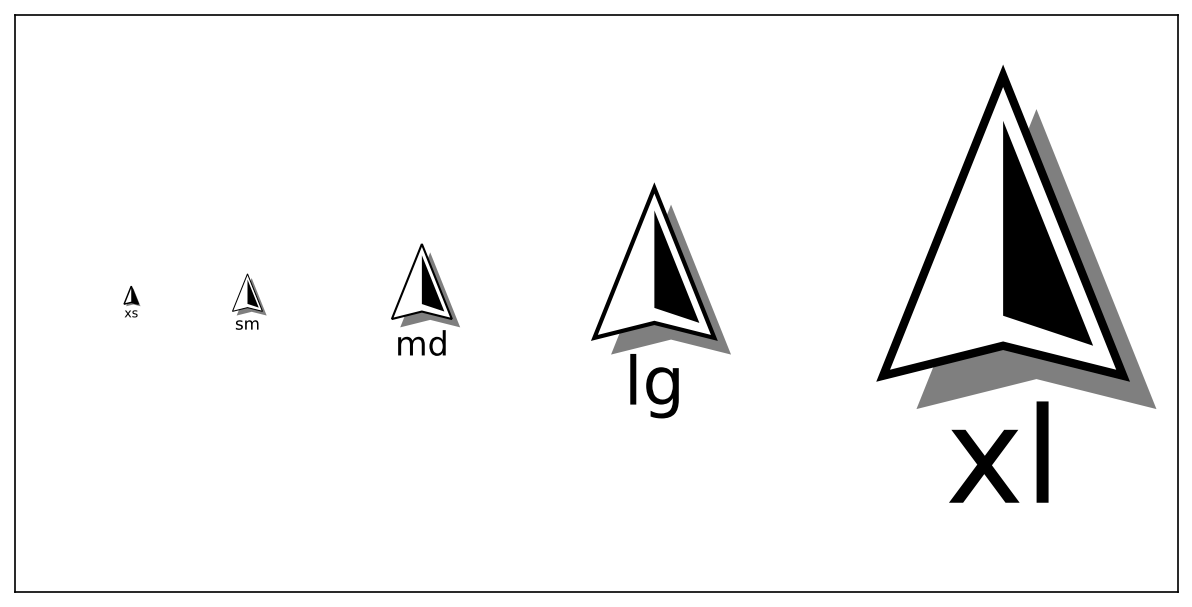

In [24]:
# Creating an empty plot - for reference, this is 10 inches x 5 inches
fig, ax = new_map(1,1, figsize=(10,5))
# Visualizing the different sizes at various positions
for l,s in zip([0.1, 0.2, 0.35, 0.55, 0.85], ["xs","sm","md","lg","xl"]):
    # Calling the function to update the defaults
    NorthArrow.set_size(size=s)
    north_arrow(ax=ax, location="center", label={"text":s}, rotation={"degrees":0}, aob={"bbox_to_anchor":(l, 0.5), "bbox_transform":ax.transAxes})

#### **Placing Arrows Outside of Axis**
Sometimes it is more desireable to place the arrow outside of the plot entirely, which can be accomplished using `bbox_to_anchor` and `bbox_transform` from the `aob`component settings. This works the same way it does for [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend).

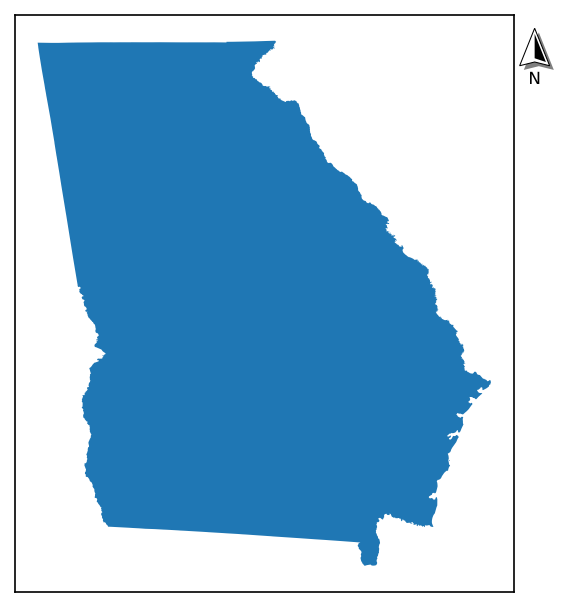

In [25]:
fig, ax = new_map()
NorthArrow.set_size(size="sm")
states.query("NAME=='Georgia'").plot(ax=ax)
north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, aob={"bbox_to_anchor":(1.1,1), "bbox_transform":ax.transAxes})